In [1]:
import numpy as np
import scipy
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, Conv3D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
from keras.utils import np_utils
from keras.layers import Dropout, Input
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

C:\Users\slowg\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = pd.read_csv(r'C:\Users\slowg\Desktop\Datasetm\Complete_Data.csv')
print(dataset.shape)

(21025, 201)


In [3]:
m,n = dataset.shape
X = dataset.iloc[:,0:n-1].values
y = dataset.iloc[:,-1].values
print(X)
print(X.shape)
print(y)
print(y.shape)

pixels = X
gt = np.transpose(y)
print(gt.shape)

[[3172 4142 4506 ... 1057 1020 1020]
 [2580 4266 4502 ... 1064 1029 1020]
 [3687 4266 4421 ... 1061 1030 1016]
 ...
 [3153 3864 4282 ... 1003 1008 1000]
 [3155 4104 4106 ... 1011 1005 1003]
 [3323 3860 4197 ... 1007 1004 1000]]
(21025, 200)
[3 3 3 ... 0 0 0]
(21025,)
(21025,)


In [4]:
X = X.reshape(145,145,200)
print(X.shape)

(145, 145, 200)


In [5]:
y = y.reshape(145,145)

In [6]:
def splitTrainTestSet(X, y, testRatio, randomState=345):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testRatio, random_state=randomState,stratify=y)
    return X_train, X_test, y_train, y_test

In [7]:
def applyPCA(X, numComponents=75):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=numComponents, whiten=True)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, pca

In [8]:
def padWithZeros(X, margin=2):
    newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
    x_offset = margin
    y_offset = margin
    newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
    return newX

In [9]:
def createImageCubes(X, y, windowSize=5, removeZeroLabels = True):
    margin = int((windowSize - 1) / 2)
    zeroPaddedX = padWithZeros(X, margin=margin)
    # split patches
    patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))
    patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
    patchIndex = 0
    for r in range(margin, zeroPaddedX.shape[0] - margin):
        for c in range(margin, zeroPaddedX.shape[1] - margin):
            patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1]   
            if c==2:
                print("Patch shape:",patch.shape)
            patchesData[patchIndex, :, :, :] = patch
            if c==2:
                print("PD:shape ",patchesData.shape)
            patchesLabels[patchIndex] = y[r-margin, c-margin]
            patchIndex = patchIndex + 1
    #if removeZeroLabels:
     #   patchesData = patchesData[patchesLabels>0,:,:,:]
      #  patchesLabels = patchesLabels[patchesLabels>0]
       # patchesLabels -= 1
    return patchesData, patchesLabels

In [10]:
k = 30
from sklearn.decomposition import PCA
X,pca = applyPCA(X,numComponents=k)

X.shape

(145, 145, 30)

In [11]:
windowSize = 5
numPCAcomponents = 30
testRatio = 0.30

In [12]:

X, y = createImageCubes(X, y, windowSize=windowSize)



Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape: (5, 5, 30)
PD:shape  (21025, 5, 5, 30)
Patch shape:

In [13]:
Xtrain, Xtest, ytrain, ytest = splitTrainTestSet(X, y, testRatio)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((14717, 5, 5, 30), (6308, 5, 5, 30), (14717,), (6308,))

In [14]:
Xtrain = Xtrain.reshape(-1, windowSize, windowSize, k)
Xtrain.shape

(14717, 5, 5, 30)

In [15]:
print(ytrain)

[10. 11.  0. ...  3. 11.  0.]


In [16]:
ytrain = np_utils.to_categorical(ytrain)
print(ytrain.shape)
print(Xtrain.shape)

(14717, 17)
(14717, 5, 5, 30)


In [17]:
input_shape= Xtrain[0].shape
print(input_shape)

(5, 5, 30)


In [18]:
C1 = 3*numPCAcomponents

In [19]:
model = Sequential()

model.add(Conv2D(C1, (3, 3), activation='relu', input_shape=input_shape))

model.add(Conv2D(3*C1, (3, 3), activation='relu'))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(6*numPCAcomponents, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(17, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
adam = Adam(lr=0.001, decay=1e-06)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [21]:
 model.fit(Xtrain, ytrain, batch_size=32, epochs=15)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
14717/14717 [==============================] - 4s 260us/step - loss: 0.8828 - acc: 0.7165
Epoch 2/15
14717/14717 [==============================] - 3s 231us/step - loss: 0.4462 - acc: 0.8504
Epoch 3/15
14717/14717 [==============================] - 3s 234us/step - loss: 0.2983 - acc: 0.8964
Epoch 4/15
14717/14717 [==============================] - 3s 233us/step - loss: 0.2145 - acc: 0.9291
Epoch 5/15
14717/14717 [==============================] - 3s 233us/step - loss: 0.1628 - acc: 0.9467
Epoch 6/15
14717/14717 [==============================] - 3s 225us/step - loss: 0.1315 - acc: 0.9584
Epoch 7/15
14717/14717 [==============================] - 3s 224us/step - loss: 0.1255 - acc: 0.9619
Epoch 8/15
14717/14717 [==============================] - 3s 224us/step - loss: 0.0991 - acc: 0.9706
Epoch 9/15
14717/14717 [==============================] - 3s 224us/step - loss: 0.0911 - acc: 0.9721
Epoch 10/15
14717/14717 [==================

In [22]:
saveytest=ytest
ytest = np_utils.to_categorical(ytest)
test_loss, test_acc = model.evaluate(Xtest, ytest)
print('Test accuracy:', test_acc)

6308/6308 [==============================] - 0s 45us/step
Test accuracy: 0.9376981610653139


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 3, 90)          24390     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 270)         218970    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 270)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 270)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_2 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 17)                3077      
Total para

In [24]:
test_eval = model.evaluate(Xtest, ytest, verbose=0)

In [25]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.26318602220225706
Test accuracy: 0.9376981610653139


In [26]:
batch_size = 64
epochs = 20
model_train = model.fit(Xtrain, ytrain, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(Xtest, ytest))

Train on 14717 samples, validate on 6308 samples
Epoch 1/20
14717/14717 [==============================] - 3s 174us/step - loss: 0.0320 - acc: 0.9908 - val_loss: 0.1709 - val_acc: 0.9627
Epoch 2/20
14717/14717 [==============================] - 2s 166us/step - loss: 0.0176 - acc: 0.9954 - val_loss: 0.1699 - val_acc: 0.9623
Epoch 3/20
14717/14717 [==============================] - 2s 164us/step - loss: 0.0108 - acc: 0.9965 - val_loss: 0.1839 - val_acc: 0.9631
Epoch 4/20
14717/14717 [==============================] - 2s 160us/step - loss: 0.0128 - acc: 0.9961 - val_loss: 0.2225 - val_acc: 0.9572
Epoch 5/20
14717/14717 [==============================] - 2s 153us/step - loss: 0.0173 - acc: 0.9943 - val_loss: 0.1888 - val_acc: 0.9639
Epoch 6/20
14717/14717 [==============================] - 2s 159us/step - loss: 0.0155 - acc: 0.9954 - val_loss: 0.1975 - val_acc: 0.9627
Epoch 7/20
14717/14717 [==============================] - 2s 167us/step - loss: 0.0169 - acc: 0.9952 - val_loss: 0.2197 - v

In [27]:
accuracy = model_train.history['acc']
print(accuracy)

[0.990758986206428, 0.9954474418150502, 0.9965346198274104, 0.9960589794115648, 0.9942923150098526, 0.9953794931032139, 0.9951756472107087, 0.9941564178291834, 0.993748726044173, 0.9925935992389754, 0.9905551403139227, 0.9921859075349658, 0.9913705238839438, 0.9921859074539648, 0.9921859075349658, 0.9937487259631719, 0.9919141129306245, 0.9936128287015017, 0.9955153903648841, 0.9952435958415438]


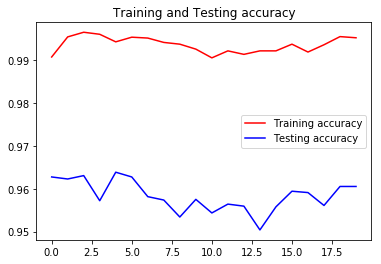

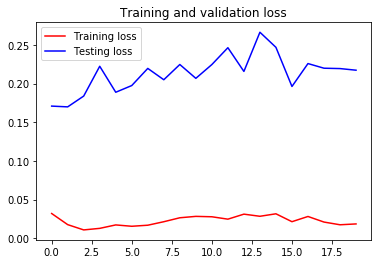

In [28]:
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Testing loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
indianpines_colors = np.array([[255, 255, 255], [255, 254, 137], [3,  28,  241], [255, 89,    1], [5,   255, 133],
                               [255,   2, 251], [89,  1,  255], [3,   171, 255], [12,  255,   7],
                               [172, 175,  84], [160, 78, 158], [101, 173, 255], [60,   91, 112],
                               [104, 192,  63], [139, 69,  46], [119, 255, 172], [254, 255,   3]])

In [30]:
predicted_classes = model.predict(Xtest)

In [31]:
print(predicted_classes)
print(predicted_classes.shape)

[[1.0000000e+00 1.3907606e-12 4.6486711e-18 ... 1.1169642e-12
  4.5122906e-16 1.7059414e-18]
 [2.3772697e-09 4.9402576e-27 5.5602583e-23 ... 1.8680283e-19
  1.2368246e-30 9.7785581e-25]
 [1.2115235e-06 2.7106126e-17 6.5624464e-11 ... 2.4011723e-13
  3.0925011e-17 4.4757821e-14]
 ...
 [1.2247942e-10 2.0847477e-26 2.7893191e-10 ... 4.6006267e-21
  1.2117202e-27 6.1016172e-26]
 [1.0000000e+00 1.2014338e-26 3.5977101e-35 ... 3.4668177e-29
  1.0972458e-24 5.9499505e-29]
 [7.8030515e-17 2.1189299e-31 1.0000000e+00 ... 2.9738571e-21
  1.6379461e-29 8.4920585e-19]]
(6308, 17)


In [32]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [33]:
print(predicted_classes)

[ 0 10 10 ... 11  0  2]


In [34]:
print(predicted_classes.shape)
print(ytest.shape)

(6308,)
(6308, 17)


In [35]:
num_classes = ytest.shape[1]

In [36]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(saveytest, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.97      0.96      0.97      3233
    Class 1       1.00      0.79      0.88        14
    Class 2       0.97      0.95      0.96       428
    Class 3       0.96      0.96      0.96       249
    Class 4       0.91      0.97      0.94        71
    Class 5       0.95      0.97      0.96       145
    Class 6       0.95      0.97      0.96       219
    Class 7       0.89      1.00      0.94         8
    Class 8       1.00      0.98      0.99       143
    Class 9       1.00      1.00      1.00         6
   Class 10       0.94      0.96      0.95       292
   Class 11       0.97      0.96      0.97       737
   Class 12       0.92      0.93      0.92       178
   Class 13       0.98      0.97      0.98        61
   Class 14       0.94      0.97      0.96       380
   Class 15       0.90      0.86      0.88       116
   Class 16       0.82      0.96      0.89        28

avg / total       0.96      0.96      0.96  

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saveytest, predicted_classes)

In [38]:
print(cm)

[[3114    0   11    4    1    7   11    1    0    0   11   18   14    1
    23   11    6]
 [   3   11    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   9    0  405    7    6    0    0    0    0    0    0    1    0    0
     0    0    0]
 [   9    0    0  239    0    0    0    0    0    0    0    1    0    0
     0    0    0]
 [   2    0    0    0   69    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   5    0    0    0    0  140    0    0    0    0    0    0    0    0
     0    0    0]
 [   6    0    0    0    0    0  213    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    8    0    0    0    0    0    0
     0    0    0]
 [   3    0    0    0    0    0    0    0  140    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    6    0    0    0    0
     0    0    0]
 [  10    0    0    0    0    0    0    0    0    0  281    0    1    0
     0    0    0]
 [  20    

In [39]:
indianpines_class_names = ['background', 'alfalfa','corn-notill','corn-min', 'corn','grass/pasture', 'grass/trees', 
                           'grass/pasture-mowed',  'hay-windrowed', 'oats', 'soybeans-notill',  'soybeans-min', 'soybean-clean',
                           'wheat', 'woods', 'bldg-grass-tree-drives', 'stone-steel towers']

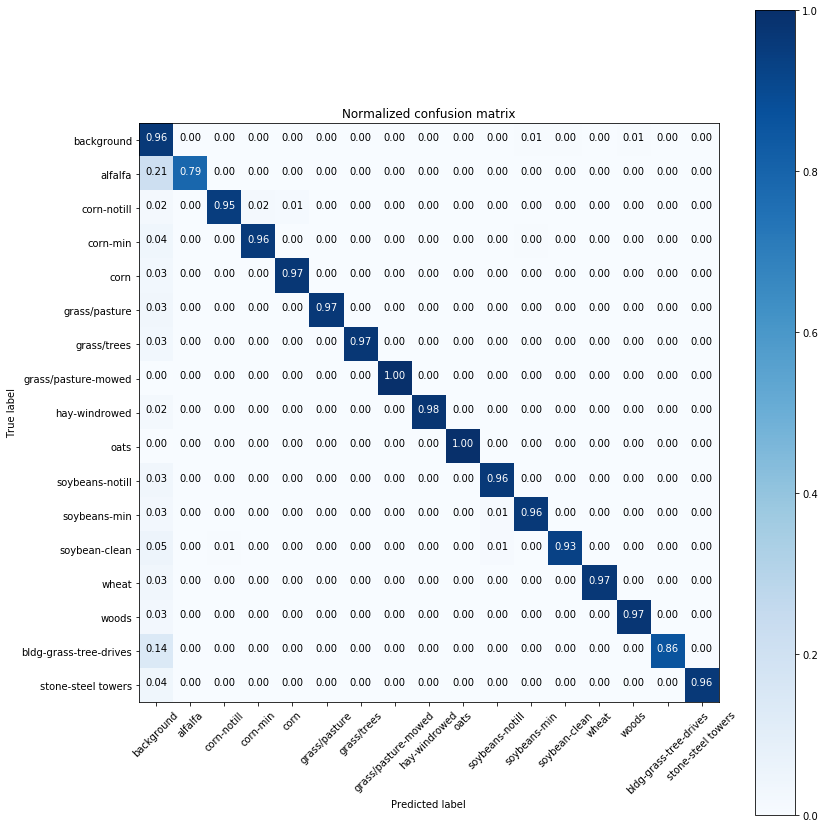

In [40]:


# Visualizing the results
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot normalized confusion matrix
plt.figure(figsize=(12, 12))
plot_confusion_matrix(cm, classes=indianpines_class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
pixels = sc.fit_transform(pixels)

C:\Users\slowg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [42]:
import sklearn.preprocessing
indianpines_colors = sklearn.preprocessing.minmax_scale(indianpines_colors, feature_range=(0, 1))
pixels_normalized = sklearn.preprocessing.minmax_scale(pixels, feature_range=(0, 1))

C:\Users\slowg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [43]:
number_of_rows=145
number_of_columns=145

In [44]:
print(gt.shape)

(21025,)


In [45]:
gt= gt.reshape((-1, 1))

In [46]:
print(gt.shape)

(21025, 1)


In [47]:
gt_thematic_map = np.zeros(shape=(number_of_rows, number_of_columns, 3))
rgb_hyperspectral_image = np.zeros(shape=(number_of_rows, number_of_columns, 3))
cont = 0
for i in range(number_of_rows):
    for j in range(number_of_columns):
        rgb_hyperspectral_image[i, j, 0] = pixels_normalized[cont, 29]
        rgb_hyperspectral_image[i, j, 1] = pixels_normalized[cont, 42]
        rgb_hyperspectral_image[i, j, 2] = pixels_normalized[cont, 89]
        gt_thematic_map[i, j, :] = indianpines_colors[gt[cont, 0]]
        cont += 1


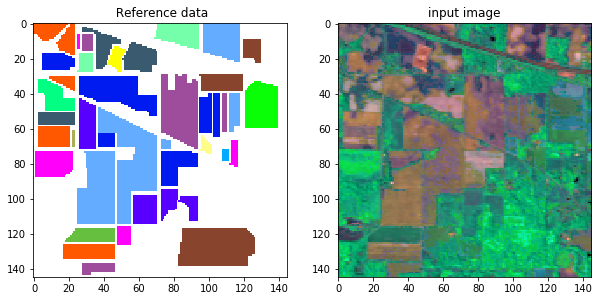

In [48]:
fig = plt.figure(figsize=(10, 10))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.title(' Reference data')

plt.imshow(gt_thematic_map)
fig.add_subplot(rows, columns, 2)
plt.title('input image')

plt.imshow(rgb_hyperspectral_image)

In [49]:
print(predicted_classes)
predicted_classes.shape

[ 0 10 10 ... 11  0  2]


(6308,)

In [50]:
pdc=model.predict_classes(X)
print(pdc)
print(pdc.shape)

[3 3 3 ... 0 0 0]
(21025,)


svm


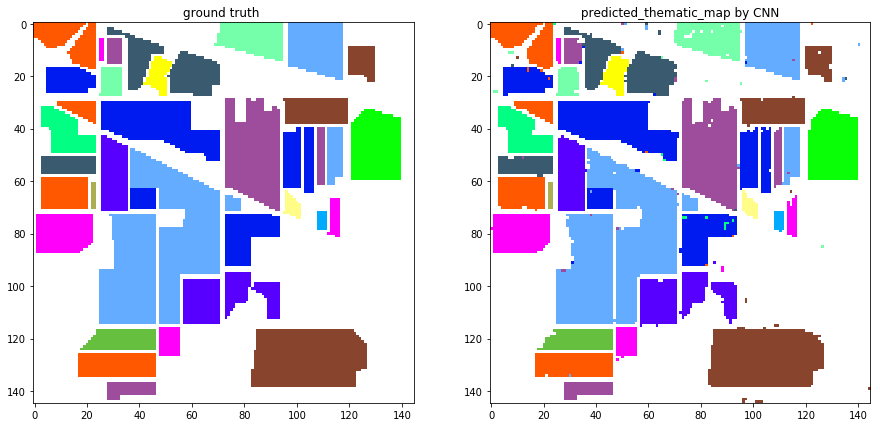

In [51]:

predicted_thematic_map = np.zeros(shape=(number_of_rows, number_of_columns, 3))
predicted_dataset =pdc

cont = 0
for i in range(number_of_rows):
    for j in range(number_of_columns):
        gt_thematic_map[i, j, :] = indianpines_colors[gt[cont, 0]]
        predicted_thematic_map[i, j, :] = indianpines_colors[predicted_dataset[cont]]
        cont += 1

fig = plt.figure(figsize=(15, 15))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.title('ground truth ')

plt.imshow(gt_thematic_map)
print('svm')
fig.add_subplot(rows, columns, 2)
plt.title(' predicted_thematic_map by CNN ')

plt.imshow(predicted_thematic_map)
plt.show()